In [1]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
import evaluators
import preprocessors
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA

# Naive Forecaster

In [ ]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

In [ ]:
Nforecaster = NaiveForecaster(strategy="last")
Nforecaster.fit(y_train)
fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
Nforecasts = Nforecaster.predict(fh=fh)

In [ ]:
Nforecaster.score(y_pred)
Nevaluator = evaluators.Evaluator(y_pred, Nforecasts)
Nevaluator.sktime_dtw()
Nevaluator.sktime_ddtw()

In [ ]:
Nforecaster.get_class_tag('scitype:y')

# Testing sktime feature selection

In [ ]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",
                                ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ["HR"],
                                                      ['O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])

In [ ]:
from sktime.transformations.series.feature_selection import FeatureSelection

transformer = FeatureSelection(method="feature-importances", n_columns=3)

Xt = transformer.fit_transform(X_train, y_train)
Xt

# Getting model tags

In [ ]:
from sktime.registry import all_estimators

#for forecaster in all_estimators(filter_tags={"scitype:y": ["multivariate", "both"]}):
 #   print(forecaster[0])

from sktime.registry import all_estimators
from sktime.base import BaseEstimator

# Get all forecasters that declare they can handle missing values
for forecaster in all_estimators(filter_tags={"capability:missing_values": True}):
    print(forecaster[0])


# Global forecasting

In [ ]:
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.summarize import WindowSummarizer

kwargs = {
    "lag_feature": {
        "lag": [1],
        "mean": [[1, 3], [3, 6]],
        "std": [[1, 4]],
    }
}

fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
pipe = ForecastingPipeline(steps=[
    ("a", WindowSummarizer(n_jobs=1, **kwargs)),
    ("forecaster", AutoARIMA(seasonal=False, max_order=50))
])
pipe_return = pipe.fit(y_train)
forecasts = pipe.predict(fh=fh)

In [ ]:
from sktime.forecasting.pytorchforecasting import PytorchForecastingDeepAR

PytorchForecastingDeepAR().get_tag(
    "capability:global_forecasting"
)  # should return True

In [ ]:
from sktime.forecasting.pytorchforecasting import PytorchForecastingDeepAR

model = PytorchForecastingDeepAR(
    trainer_params={
        "max_epochs": 5,  # for quick test
        "limit_train_batches": 50,  # for quick test
    },
    dataset_params={
        "max_encoder_length": 3,
    },
)

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
model.fit(y=y_train, fh=fh)

In [ ]:
forecasts = model.predict()

# best params 

In [ ]:

from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.split import ExpandingWindowSplitter
from sktime.forecasting.naive import NaiveForecaster

cv = ExpandingWindowSplitter(initial_window=5, step_length=1, fh=[1, 2, 3])
forecaster = NaiveForecaster()
param_grid = {"strategy": ["last", "mean", "median"]}
gscv = ForecastingGridSearchCV(
    forecaster=forecaster,
    param_grid=param_grid,
    cv=cv)
gscv.fit(y_train)

fcsts = gscv.predict(fh)
gscv.best_params_

# -1 imputation vs ffill

In [4]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=10, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 10 patients.


In [5]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)

In [6]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
dtws = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 285.27607432483893
Median sktime DTW distance for feature O2Sat: 12.424393298980004
Median sktime DTW distance for feature SBP: 408.4123165504968
Median sktime DTW distance for feature MAP: 372.61848933660326
Median sktime DTW distance for feature DBP: 56.556781892469395
Median sktime DTW distance for feature Resp: 34.25219436740443
Median sktime DTW distance for feature Temp: 0.022178086323338175


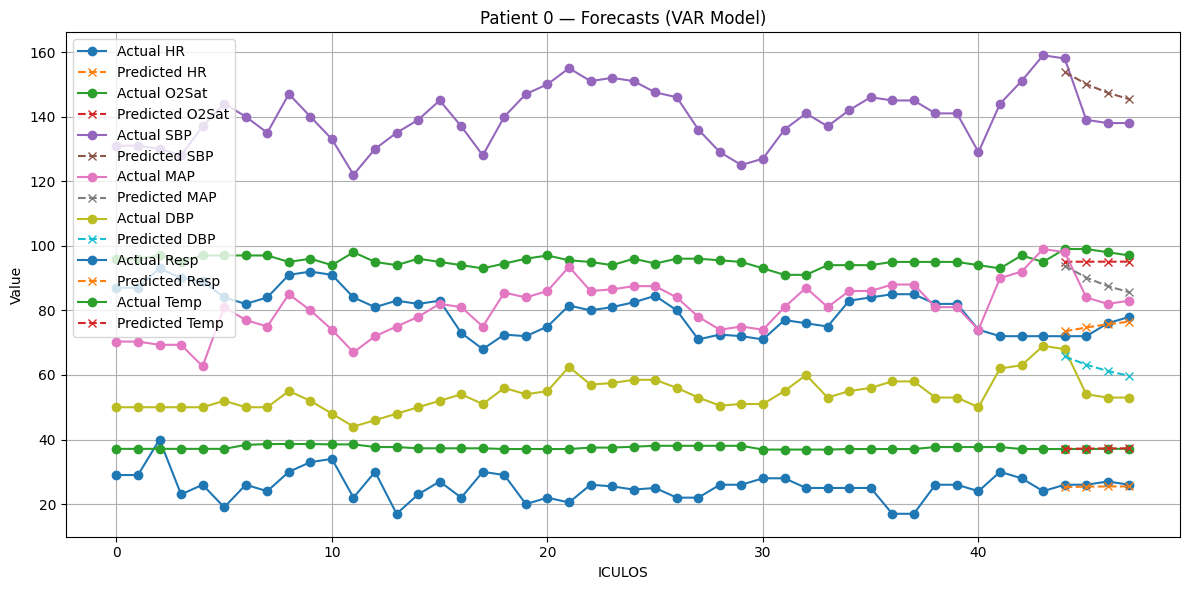

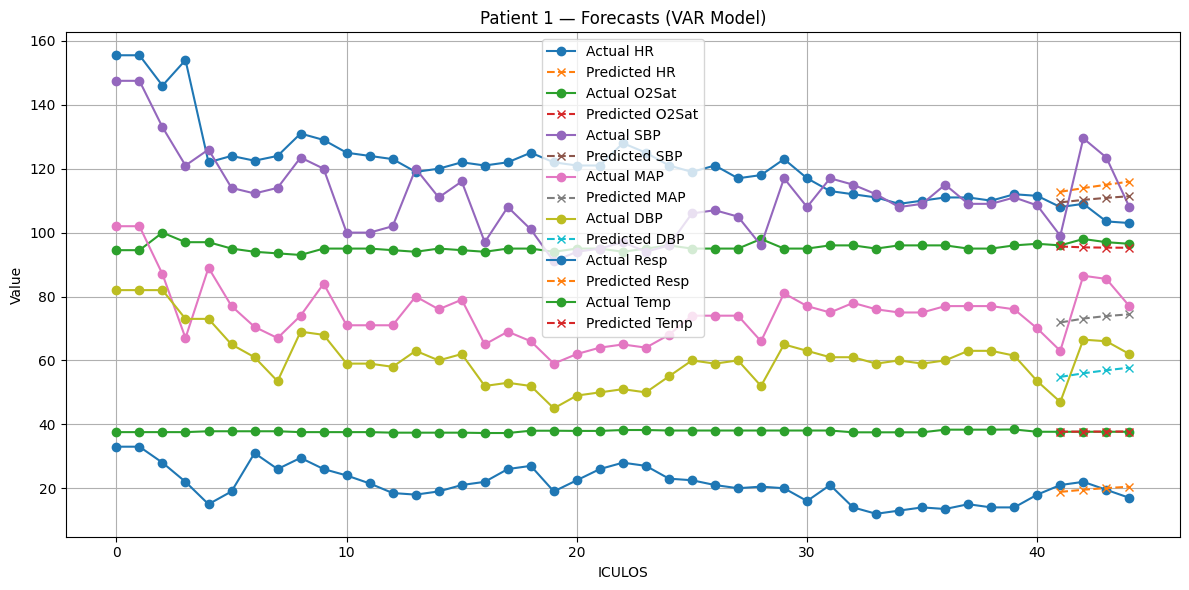

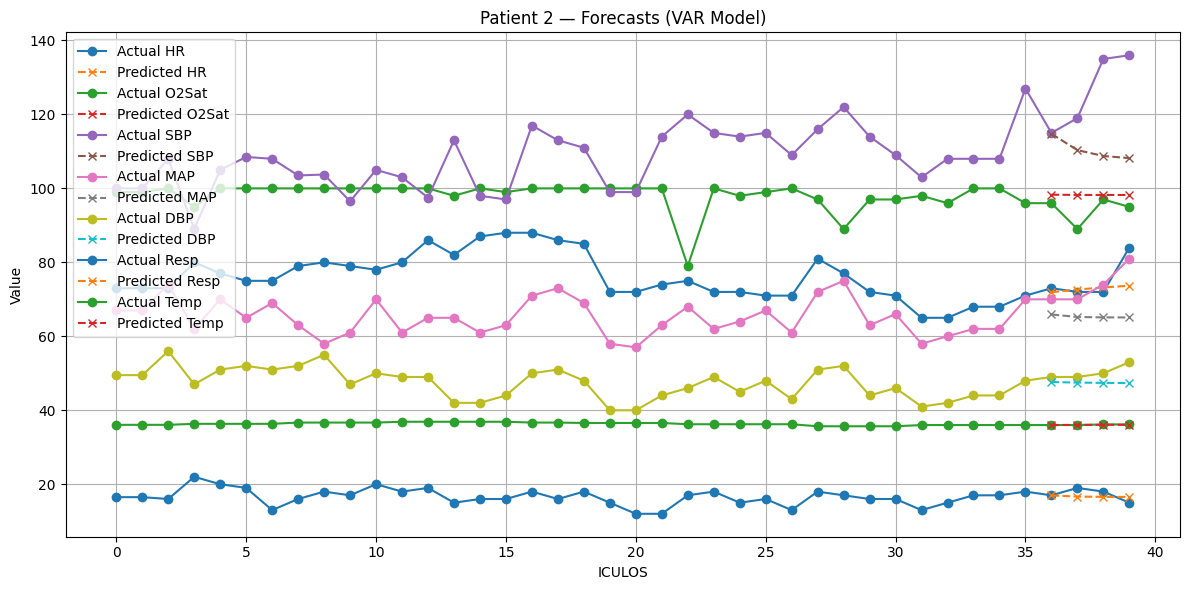

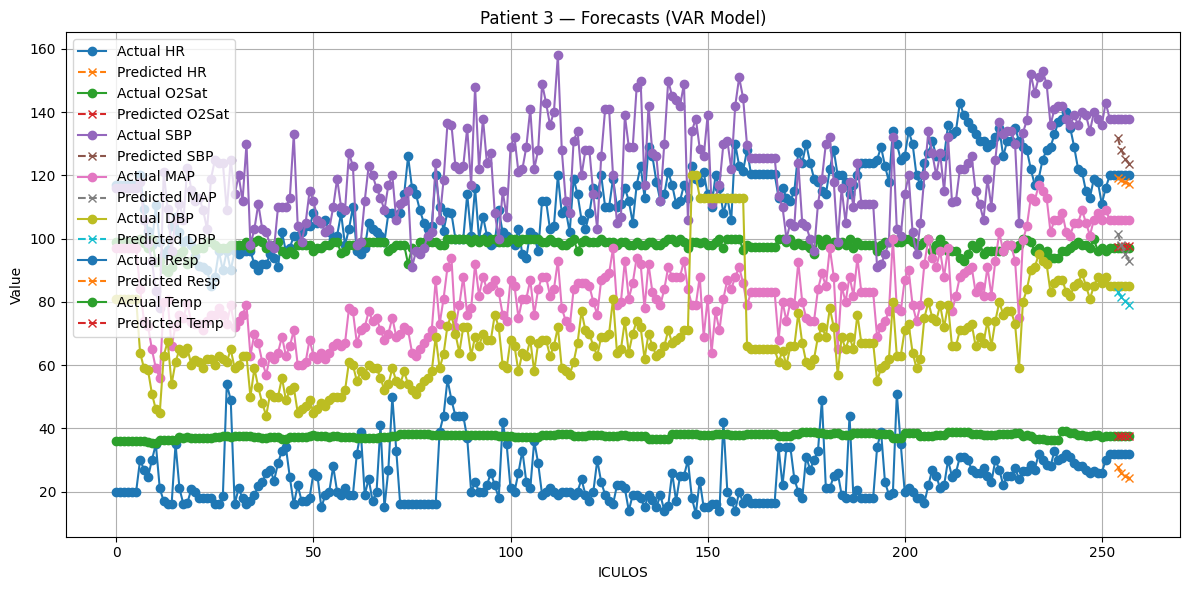

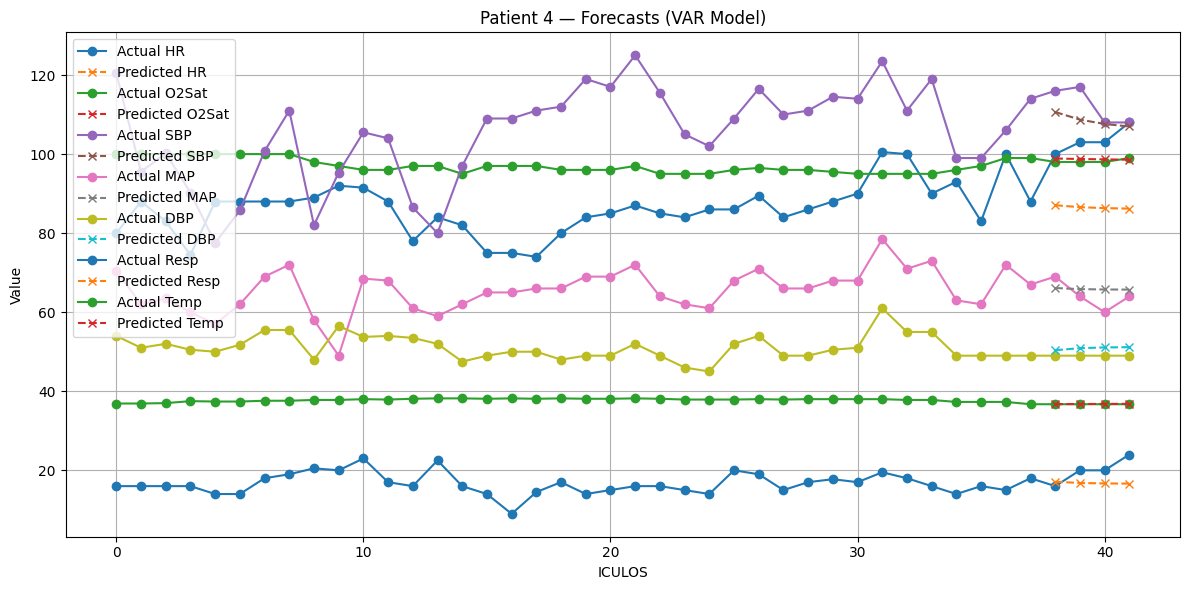

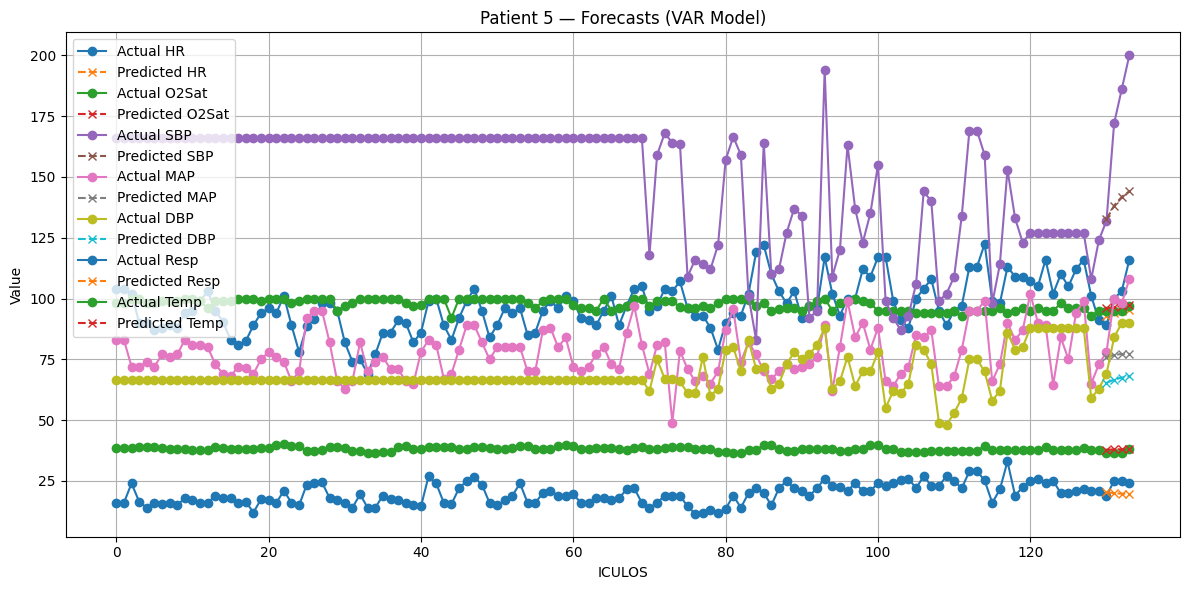

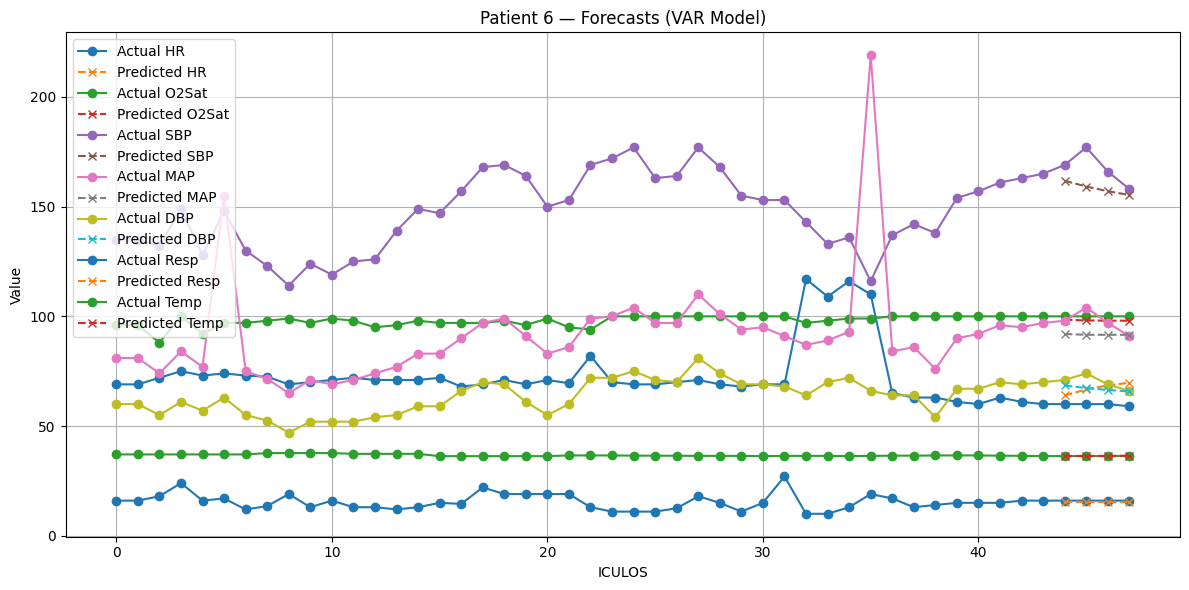

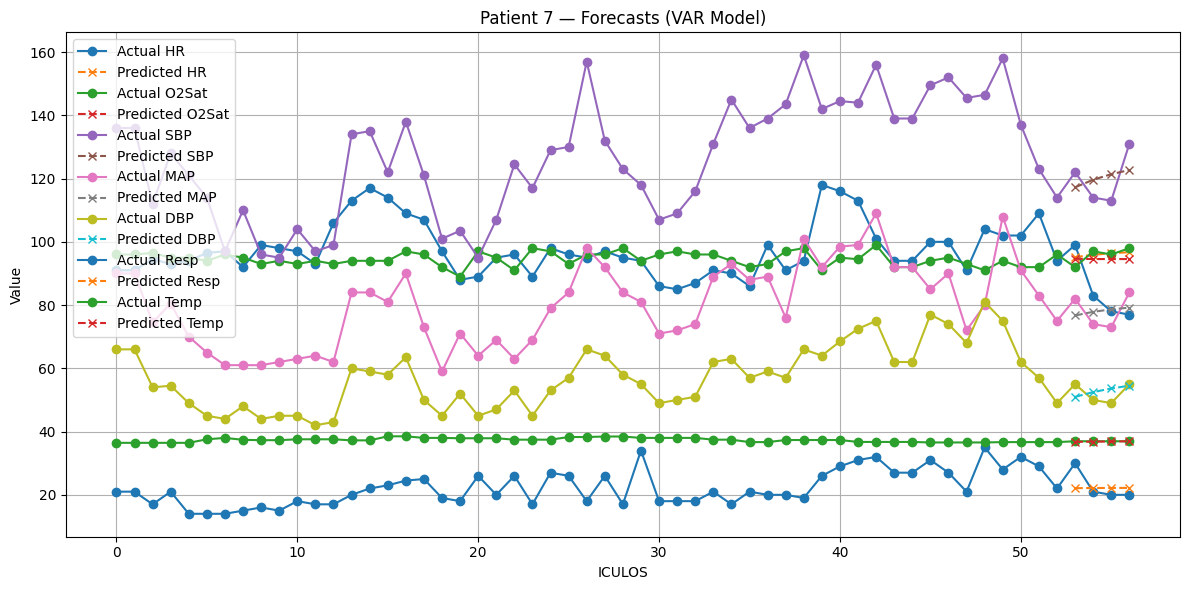

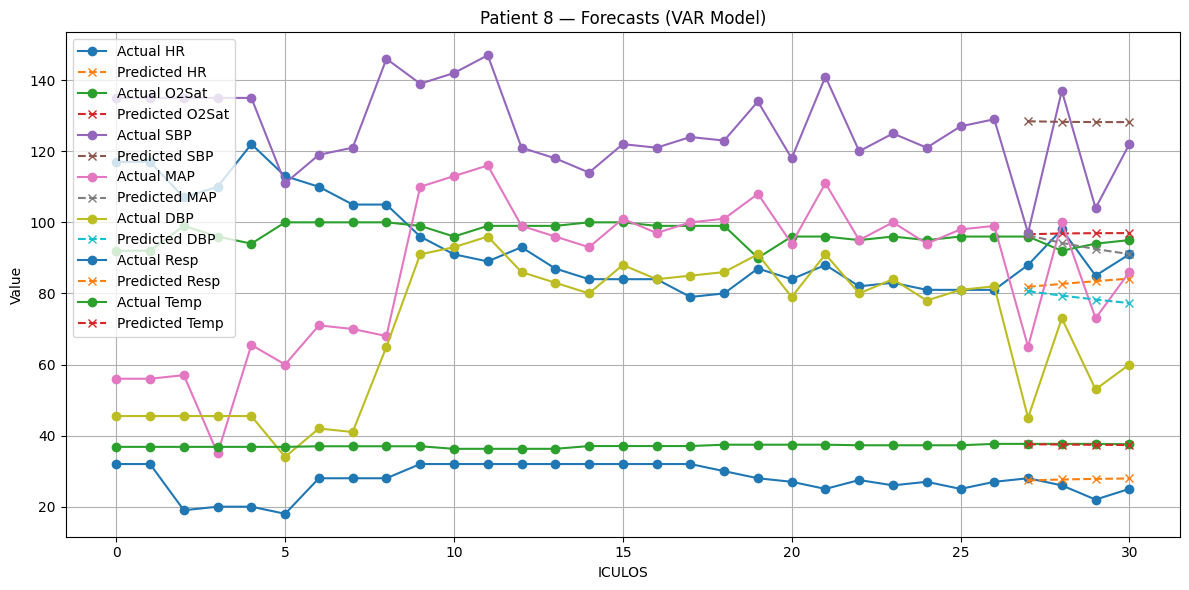

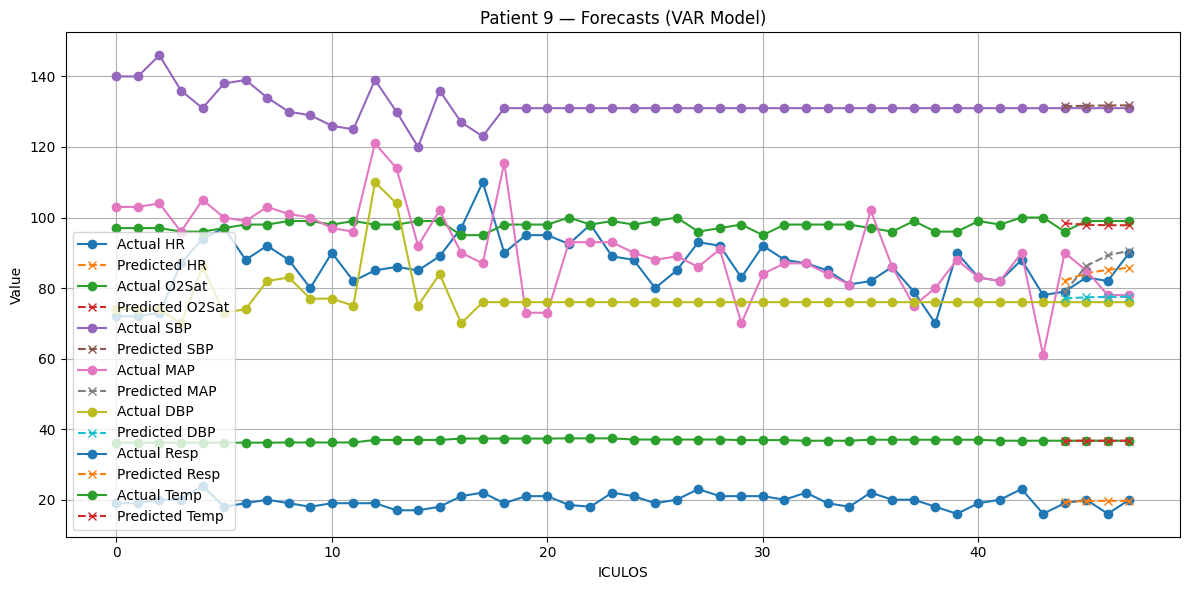

In [7]:
myEvaluator.plot_multivar(10)

In [8]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=10, min_time_points=30)
df = myLoader.panel_imputer(df, "-1")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 10 patients.


In [9]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)

In [10]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
dtws = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 365.59438906290393
Median sktime DTW distance for feature O2Sat: 161.76061366409286
Median sktime DTW distance for feature SBP: 883.3784942616014
Median sktime DTW distance for feature MAP: 574.1597604655474
Median sktime DTW distance for feature DBP: 271.7960536879731
Median sktime DTW distance for feature Resp: 51.436207268285266
Median sktime DTW distance for feature Temp: 1074.173585440346


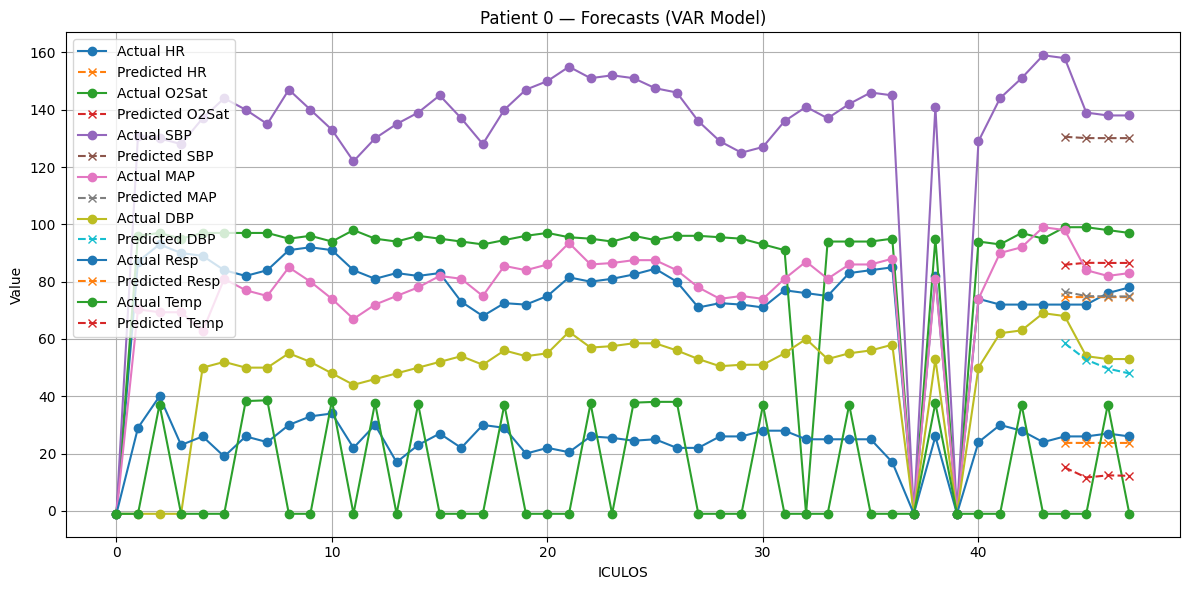

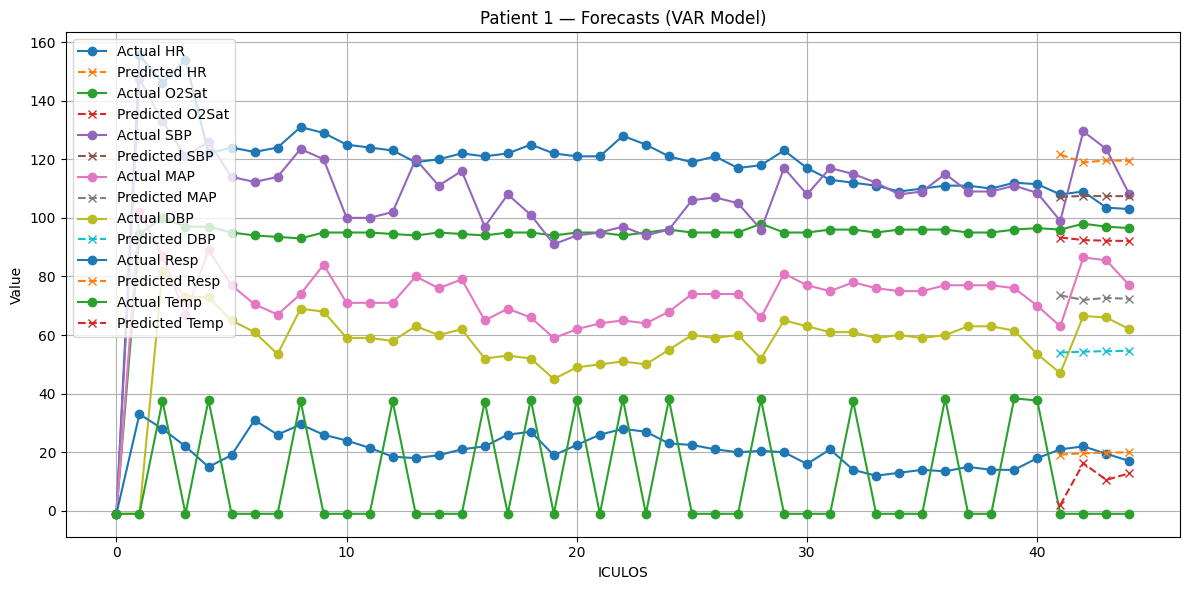

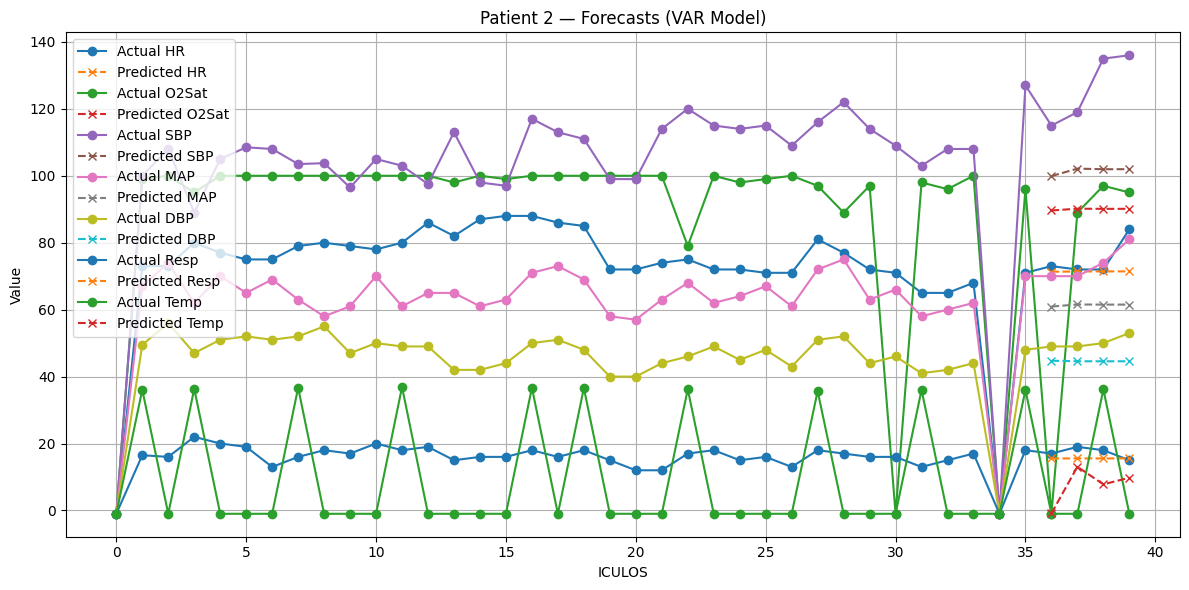

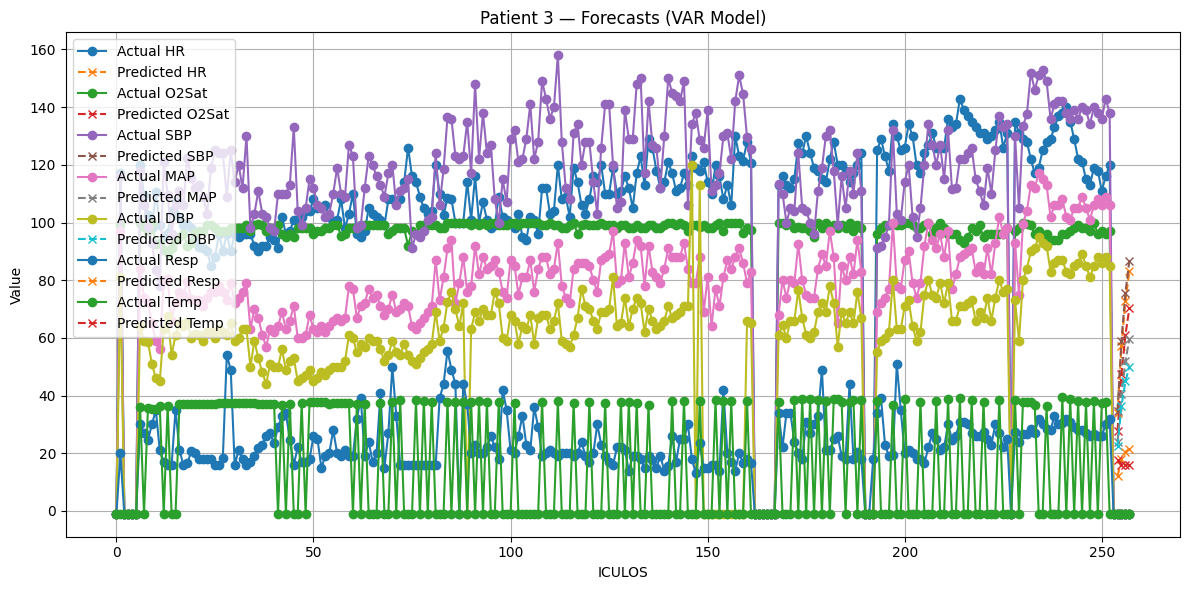

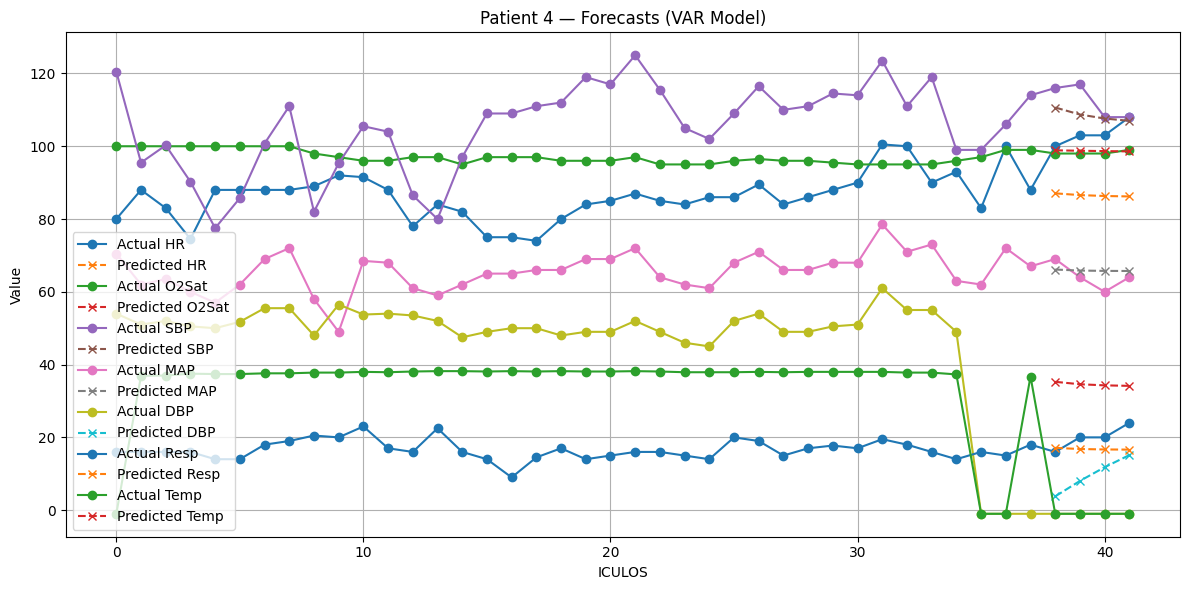

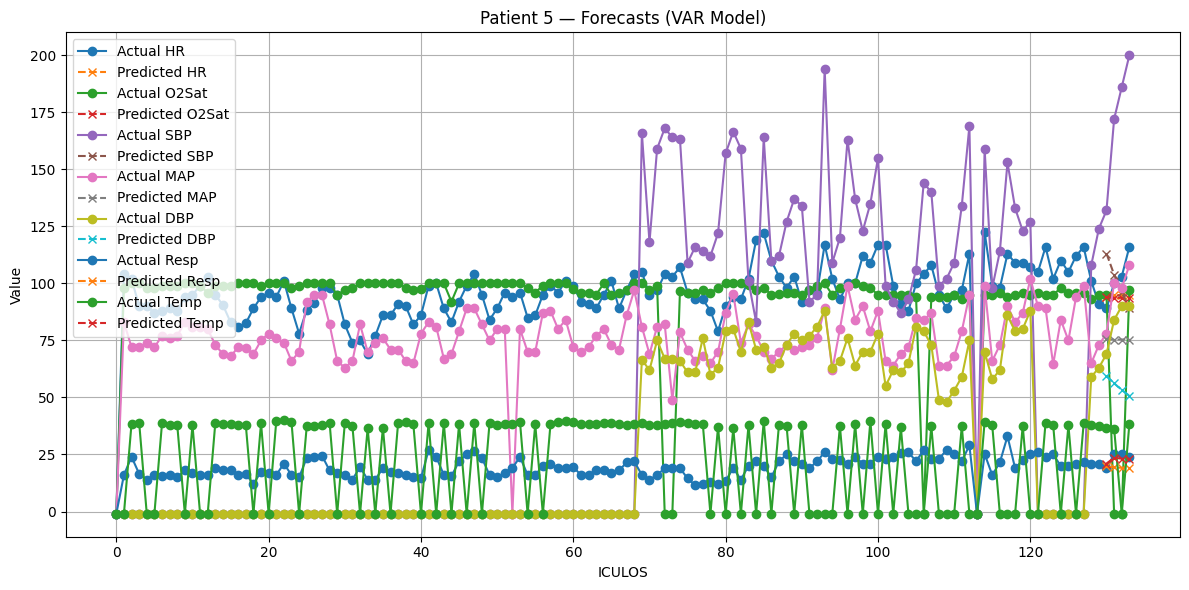

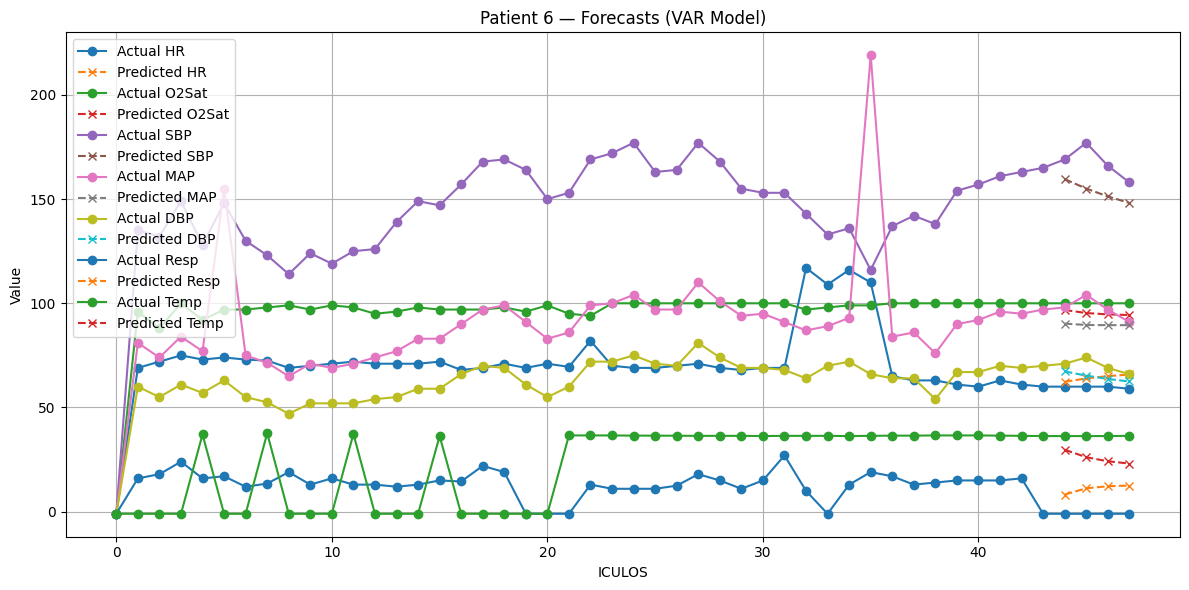

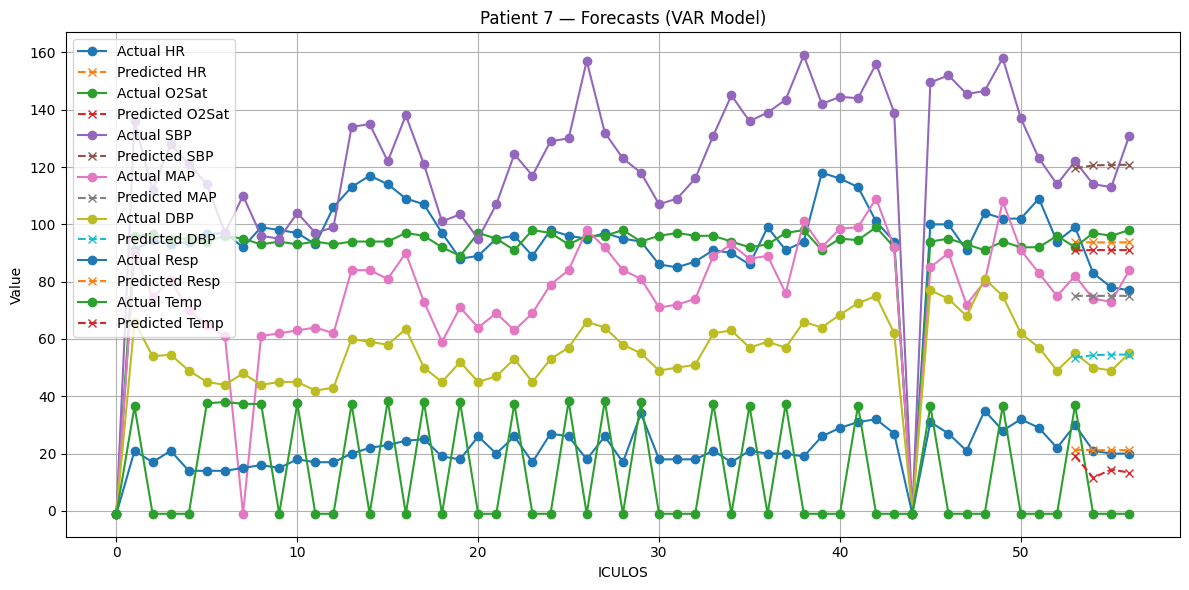

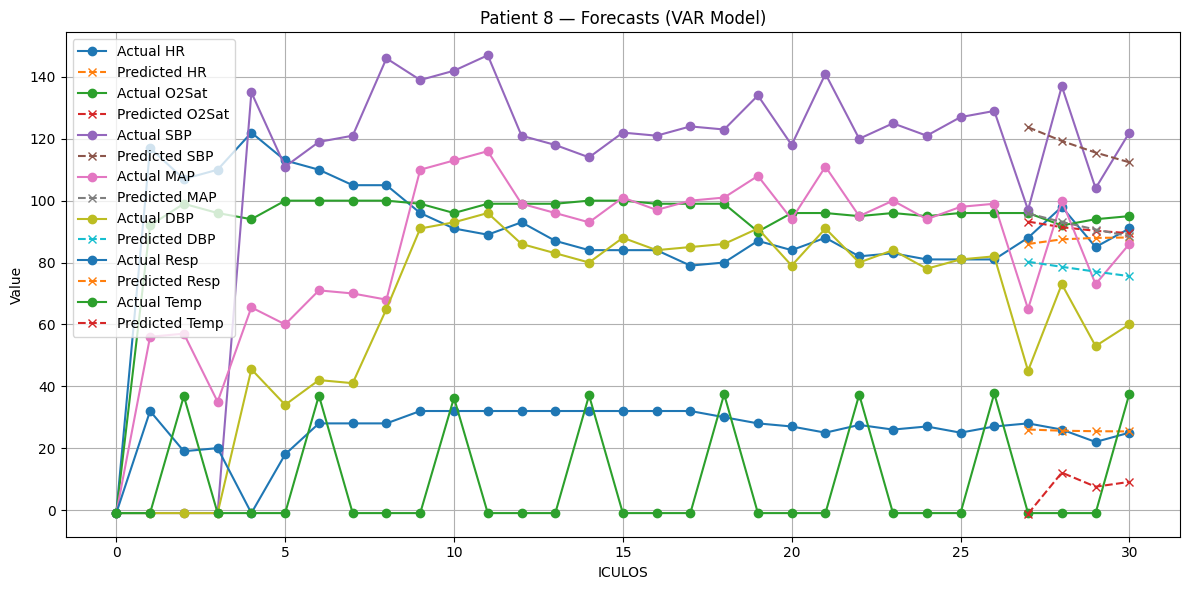

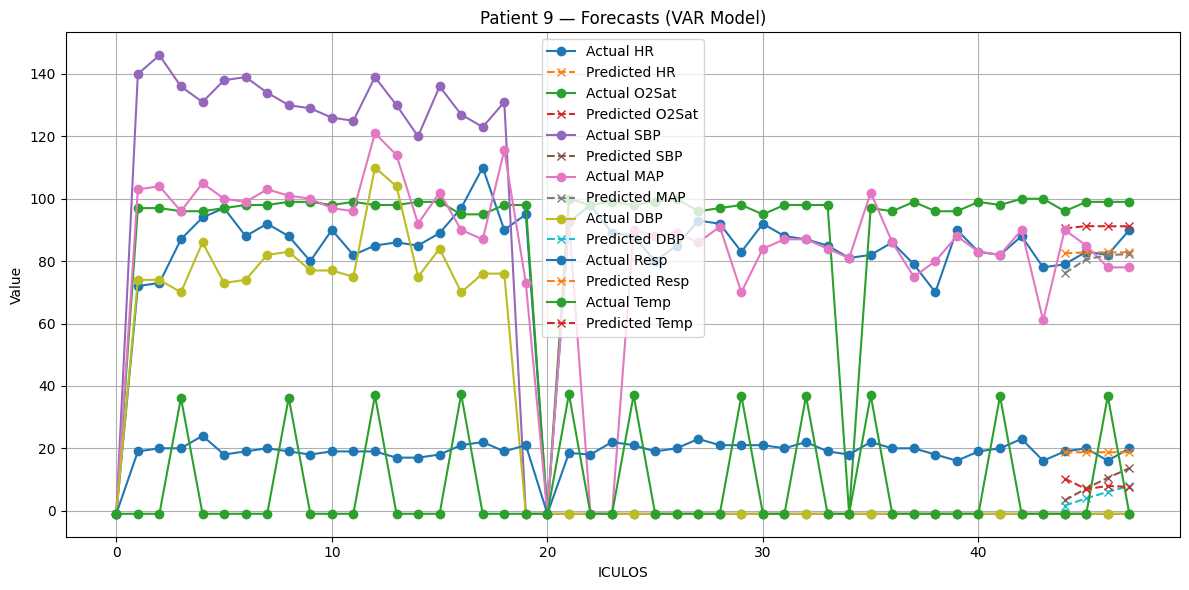

In [11]:
myEvaluator.plot_multivar(10)